<img src="Capture.JPG2.JPG" style="width:100px;height:100px;">

With [profile](linkedin.com/in/taiwo-omileye-18940a1b3)   

# Exploratory Data Analysis for Breast Cancer Survival

# (1.0) Objective

This dataset has cases from a finding that was done between 1958 and 1970 at the university of chicago's Billings Hospital 
on the patients' survival that had undergone breast's cancer surgery. It contains age of patient at time of operation, patient's year of operation, number of positive axillary nodes detected and survival status. The status of the class label 1 indicate survival with at least 5 years of surgery's period while 2 indicate survival with at most 5 years of surgery's period respectively. The main point is to determine which feature(s) is the most important factor for survival patients.


In [1]:
# Import the neccessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset,binary conversion and its summary
taiwo = pd.read_csv('haberman.csv')
print(taiwo.head())
print(taiwo.shape)
print(taiwo.info())
print(taiwo.columns)
taiwo['status'] = taiwo['status'].map({1:'yes',2:'no'})
print(taiwo['status'].value_counts())
print(taiwo['status'].unique())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
(305, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age       305 non-null int64
year      305 non-null int64
nodes     305 non-null int64
status    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None
Index(['age', 'year', 'nodes', 'status'], dtype='object')
yes    225
no      80
Name: status, dtype: int64
['yes' 'no']


- From the above dataset analysis, there are 305 observations/rows with 4 features/columns and 2 class labels(1 or 2). 
- Each column include age, year, nodes as the integer data type and status variable with status as the class label.
- There are 225 observations/data-points for class labels 1(yes) and 80 observations for class label 2(no) respectively indicating unbalanced dataset.

# (1.1) Univariate Analysis

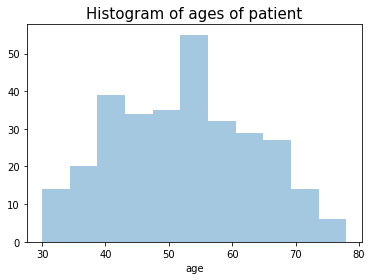

In [3]:
sns.distplot(taiwo['age'],kde=False)
plt.title('Histogram of ages of patient', fontsize=15)
plt.show()

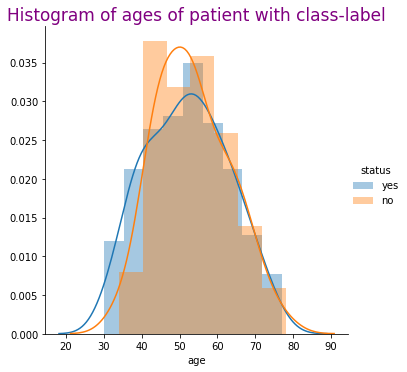

In [4]:
sns.FacetGrid(taiwo,hue='status',height=5)\
   .map(sns.distplot,'age')\
   .add_legend();
plt.title('Histogram of ages of patient with class-label', fontsize=17,color='purple')
plt.show();

# Observation
 -Younger people died from the breast cancer with at least 5 years of surgery than those with at most 5 years of surgery.
 
 -Though, more people died with at most 5 years of surgery from the same vein between the age of 40 and 65 years old than the     former.

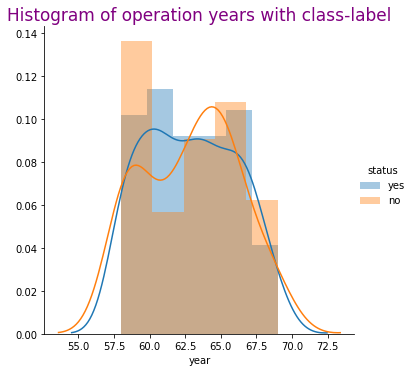

In [5]:
sns.FacetGrid(taiwo,hue='status',height=5)\
   .map(sns.distplot,'year')\
   .add_legend();
plt.title('Histogram of operation years with class-label', fontsize=17,color='purple')
plt.show();

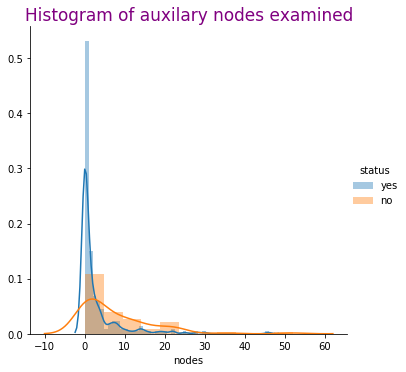

In [6]:
sns.FacetGrid(taiwo,hue='status',height=5)\
   .map(sns.distplot,'nodes')\
   .add_legend();
plt.title('Histogram of auxilary nodes examined', fontsize=17,color='purple')
plt.show();

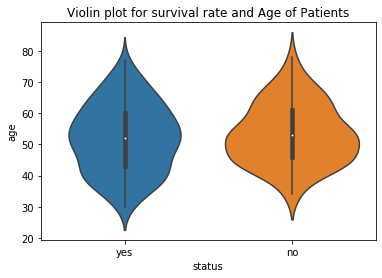

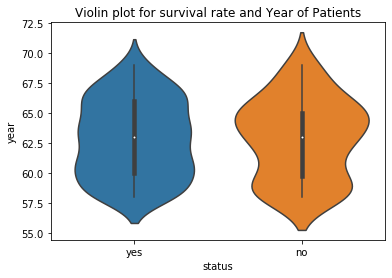

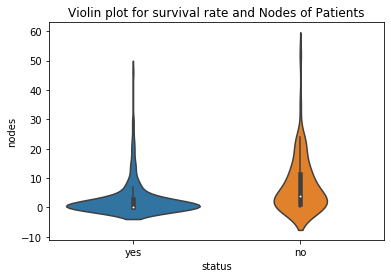

In [7]:
sns.violinplot(x='status',y='age',data = taiwo, size=10)
plt.title('Violin plot for survival rate and Age of Patients')
plt.show();

sns.violinplot(x='status',y='year',data = taiwo, size=10)
plt.title('Violin plot for survival rate and Year of Patients')
plt.show();

sns.violinplot(x='status',y='nodes',data = taiwo, size=10)
plt.title('Violin plot for survival rate and Nodes of Patients')
plt.show();

# Observation
- 55% of people that survived with at least 5 years of surgery mostly diagnosed with less than 4 nodes.

# (1.2) Bivariate Analysis

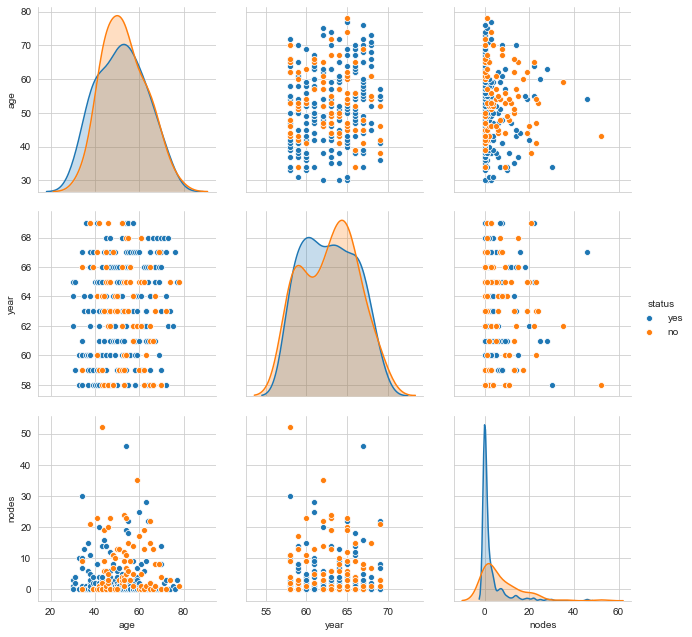

In [8]:
sns.set_style('whitegrid');
sns.pairplot(taiwo, hue = 'status', height=3, diag_kind='kde');
plt.show();

Observation:
- Smaller nodes of breast cancer patient that survived at least 5 years of surgery can be observed from above than those survived with at most 5 years, this is an indication of more nodes diagnosis for breast cancer with less years of survival age.

# Correlational Analysis Between Columns

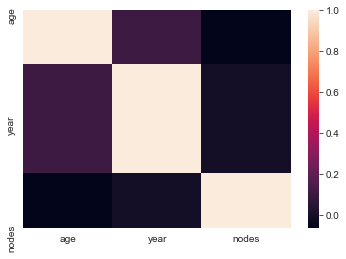

In [10]:
corr = taiwo.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Observation:
- From the figure above, it can be concluded that there is no significant correlation between the given attributes.

# Mean, Median, Percentile and Std.

In [9]:
# Mean, Variance, Std-deviation,
status_yes = taiwo.loc[taiwo['status']=='yes']
status_no = taiwo.loc[taiwo['status']=='no']
print(status_yes.describe());
print('\n-------------------------------------------\n')
print(status_no.describe());
print('\n-------------------------------------------\n')
print('Means:')
print(np.mean(taiwo['age']));
print(np.mean(taiwo['year']));
print(np.mean(taiwo['nodes']));
print('\nStd-dev:');
print(np.std(taiwo['age']))
print(np.std(taiwo['year']))
print(np.std(taiwo['nodes']))

print('\n-------------------------------------------\n')
#Median with an outlier
print('\nMedians:')
print(np.median(taiwo['age']));
print(np.median(taiwo['year']));
print(np.median(taiwo['nodes']));
print('\n-------------------------------------------\n')
print('\n90th Percentiles:')
print(np.percentile(status_yes['age'],90))
print(np.percentile(status_yes['year'],90))
print(np.percentile(status_yes['nodes'],90))
print('\n-------------------------------------------\n')
print(np.percentile(status_no['age'],90))
print(np.percentile(status_no['year'],90))
print(np.percentile(status_no['nodes'],90))

              age        year       nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000

-------------------------------------------

             age       year      nodes
count  80.000000  80.000000  80.000000
mean   53.312500  62.887500   7.525000
std     9.677841   3.318509   9.222942
min    34.000000  58.000000   0.000000
25%    46.000000  59.750000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.250000
max    78.000000  69.000000  52.000000

-------------------------------------------

Means:
52.35737704918033
62.868852459016395
4.032786885245901

Std-dev:
10.660490239033228
3.237462119968612
7.188714317925433

-------------------------------------------


Media

# Observation

- Less than 90% of patients that survived with at least 5 years(i.e more than 5 years) have 67 or lower years of age and only 10% of them have more than 67 years of age.
- Similarly, less than 90% of patients that survived with at least 5 years(i.e more than 5 years) have 8 or lower nodes of cancer detection and only 10% of them have more than 8 nodes of cancer detection.
- Less than 90% of patients that survived with at least 5 years(i.e more than 5 years) have 66 or lower years of age and only 10% of them have more than 66 years of age.
- Similarly, less than 90% of patients that survived with at least 5 years(i.e more than 5 years) have 20 or lower nodes of cancer detection and only 10% of them have more than 20 nodes of cancer detection.
- Majority of the patient that survived with at least 5 years of operation from breast cancer are people between the age of 41 and 63 years, in this category the average nodes observed is 3 with an outlier for breast cancer.
- In the same vein, majority of the patient that survived with at most 5 years of operation from breast cancer are people between the age of 44 and 62 years, in this category the average nodes observed is 8 with an outlier for breast cancer indicating more nodes diagnosis for breast cancer with less years of survival age.

# (1.3) Conclusion

From the above, there is no single variable/attribute that linearly correllated with a given status as 1(yes) or 2(no) respectively. Hence the given features are not linearly separable as factor to surviving patients status.

Courtesy: TAIWO OMILEYE 
- With [profile](linkedin.com/in/taiwo-omileye-18940a1b3)    